# Principales mercados de acciones 
#moviemiento de los principales mercados de USA en los ultimos 6 meses
#analizados con medias moviles de 20 y 50

In [1]:
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go

# Obtener Datos

In [2]:
datos = yf.Ticker('^DJI')

In [3]:
Dow = datos.history(period='6mo')

In [4]:
Dow.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-29,34985.988281,35171.519531,34985.988281,35084.531250,222680000,0,0
2021-07-30,35013.261719,35106.300781,34871.128906,34935.468750,276410000,0,0
2021-08-02,34968.558594,35192.109375,34808.199219,34838.160156,238620000,0,0
2021-08-03,34864.101562,35120.941406,34714.328125,35116.398438,259820000,0,0
2021-08-04,35047.441406,35047.441406,34790.621094,34792.671875,245300000,0,0


In [5]:
Dow['MA_20'] = Dow.Close.rolling(20).mean()

In [6]:
Dow['MA_50'] = Dow.Close.rolling(50).mean()

In [7]:
Dow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-07-29 to 2022-01-28
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          128 non-null    float64
 1   High          128 non-null    float64
 2   Low           128 non-null    float64
 3   Close         128 non-null    float64
 4   Volume        128 non-null    int64  
 5   Dividends     128 non-null    int64  
 6   Stock Splits  128 non-null    int64  
 7   MA_20         109 non-null    float64
 8   MA_50         79 non-null     float64
dtypes: float64(6), int64(3)
memory usage: 10.0 KB


In [8]:
Dow['Fecha'] = Dow.index

In [9]:
Dow.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_20,MA_50,Fecha
Date,,,,,,,,,,
2021-07-29,34985.988281,35171.519531,34985.988281,35084.531250,222680000,0,0,NaN,NaN,2021-07-29
2021-07-30,35013.261719,35106.300781,34871.128906,34935.468750,276410000,0,0,NaN,NaN,2021-07-30
2021-08-02,34968.558594,35192.109375,34808.199219,34838.160156,238620000,0,0,NaN,NaN,2021-08-02
2021-08-03,34864.101562,35120.941406,34714.328125,35116.398438,259820000,0,0,NaN,NaN,2021-08-03
2021-08-04,35047.441406,35047.441406,34790.621094,34792.671875,245300000,0,0,NaN,NaN,2021-08-04


# Mostrar precios de cierre

Text(0, 0.5, 'Close Price')

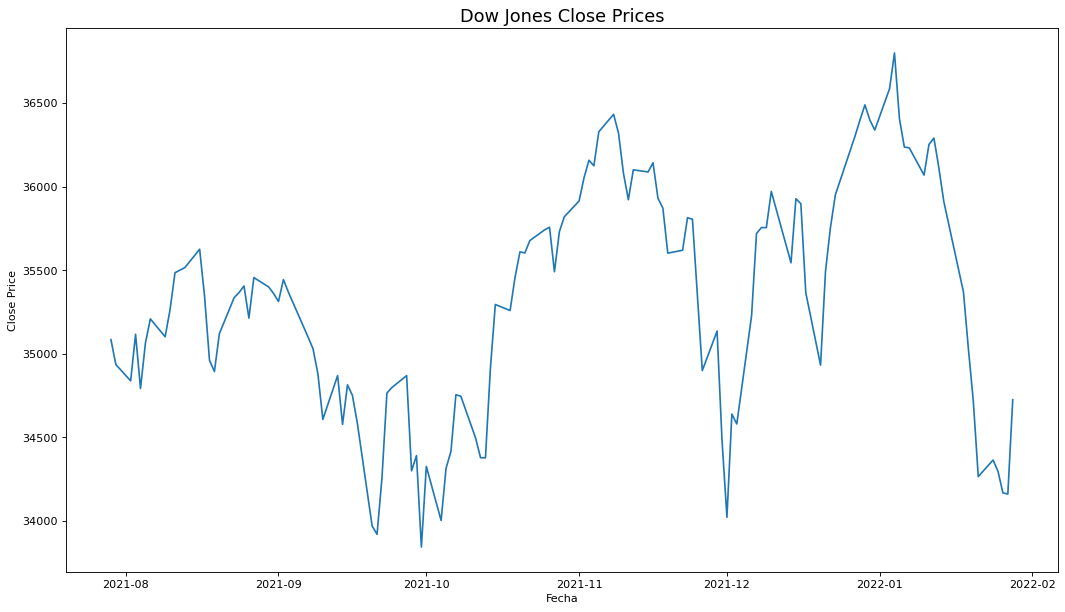

In [10]:
plt.figure(figsize=(16,9),dpi=80)
plt.plot(Dow.Close)
plt.title('Dow Jones Close Prices', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Close Price')

# Graficar Medias Moviles

Text(0, 0.5, 'Close Price')

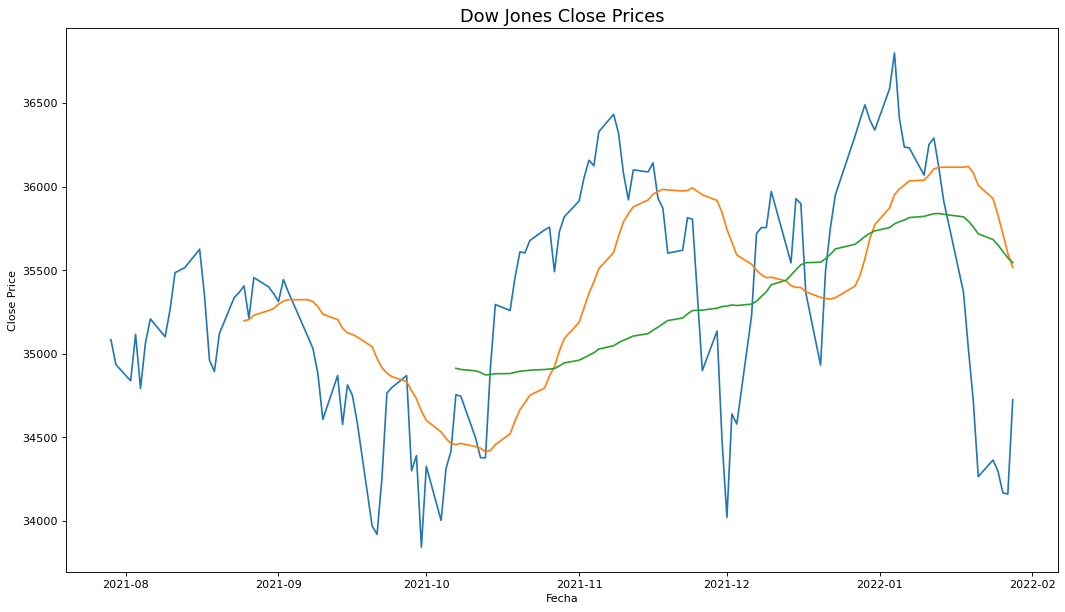

In [11]:
plt.figure(figsize=(16,9),dpi=80)
plt.plot(Dow.Close)
plt.plot(Dow.MA_20)
plt.plot(Dow.MA_50)
plt.title('Dow Jones Close Prices', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Close Price')

In [12]:
Mercados = ['^DJI','^IXIC','^GSPC']
data_mercados = yf.download(Mercados, period='6mo')

[*********************100%***********************]  3 of 3 completed


In [13]:
data_mercados.columns

MultiIndex([('Adj Close',  '^DJI'),
            ('Adj Close', '^GSPC'),
            ('Adj Close', '^IXIC'),
            (    'Close',  '^DJI'),
            (    'Close', '^GSPC'),
            (    'Close', '^IXIC'),
            (     'High',  '^DJI'),
            (     'High', '^GSPC'),
            (     'High', '^IXIC'),
            (      'Low',  '^DJI'),
            (      'Low', '^GSPC'),
            (      'Low', '^IXIC'),
            (     'Open',  '^DJI'),
            (     'Open', '^GSPC'),
            (     'Open', '^IXIC'),
            (   'Volume',  '^DJI'),
            (   'Volume', '^GSPC'),
            (   'Volume', '^IXIC')],
           )

# Variables de medias moviles

In [14]:
data_mercados['MA_20_DJ'] = data_mercados.Close['^DJI'].rolling(20).mean()
data_mercados['MA_20_S&P'] = data_mercados.Close['^GSPC'].rolling(20).mean()
data_mercados['MA_20_NASDAQ'] = data_mercados.Close['^IXIC'].rolling(20).mean()
data_mercados['MA_50_DJ'] = data_mercados.Close['^DJI'].rolling(50).mean()
data_mercados['MA_50_S&P'] = data_mercados.Close['^GSPC'].rolling(50).mean()
data_mercados['MA_50_NASDAQ'] = data_mercados.Close['^IXIC'].rolling(50).mean()

In [15]:
data_mercados.head()

Adj Close                                    Close  \
                    ^DJI        ^GSPC         ^IXIC          ^DJI   
Date                                                                
2021-07-29  35084.531250  4419.149902  14778.259766  35084.531250   
2021-07-30  34935.468750  4395.259766  14672.679688  34935.468750   
2021-08-02  34838.160156  4387.160156  14681.070312  34838.160156   
2021-08-03  35116.398438  4423.149902  14761.290039  35116.398438   
2021-08-04  34792.671875  4402.660156  14780.530273  34792.671875   

                                               High               \
                  ^GSPC         ^IXIC          ^DJI        ^GSPC   
Date                                                               
2021-07-29  4419.149902  14778.259766  35171.519531  4429.970215   
2021-07-30  4395.259766  14672.679688  35106.300781  4412.250000   
2021-08-02  4387.160156  14681.070312  35192.109375  4422.180176   
2021-08-03  4423.149902  14761.290039  35120.941406  4423.790039   
2021-08-04  4402.660156  14780.530273  35047.441406  4416.169922   

                                   Low  ...          Open     Volume  \
                   ^IXIC          ^DJI  ...         ^IXIC       ^DJI   
Date                                    ...                            
2021-07-29  14833.740234  34985.988281  ...  14771.169922  222680000   
2021-07-30  14728.780273  34871.128906  ...  14615.849609  276410000   
2021-08-02  14770.410156  34808.199219  ...  14758.599609  238620000   
2021-08-03  14762.599609  34714.328125  ...  14713.990234  259820000   
2021-08-04  14812.370117  34790.621094  ...  14747.209961  245300000   

                                   MA_20_DJ MA_20_S&P MA_20_NASDAQ MA_50_DJ  \
                 ^GSPC       ^IXIC                                            
Date                                                                          
2021-07-29  2815510000  3904590000      NaN       NaN          NaN      NaN   
2021-07-30  2861600000  3628750000      NaN       NaN          NaN      NaN   
2021-08-02  2919940000  3738200000      NaN       NaN          NaN      NaN   
2021-08-03  3305340000  4117520000      NaN       NaN          NaN      NaN   
2021-08-04  3382620000  4319400000      NaN       NaN          NaN      NaN   

           MA_50_S&P MA_50_NASDAQ  
                                   
Date                               
2021-07-29       NaN          NaN  
2021-07-30       NaN          NaN  
2021-08-02       NaN          NaN  
2021-08-03       NaN          NaN  
2021-08-04       NaN          NaN  

[5 rows x 24 columns]

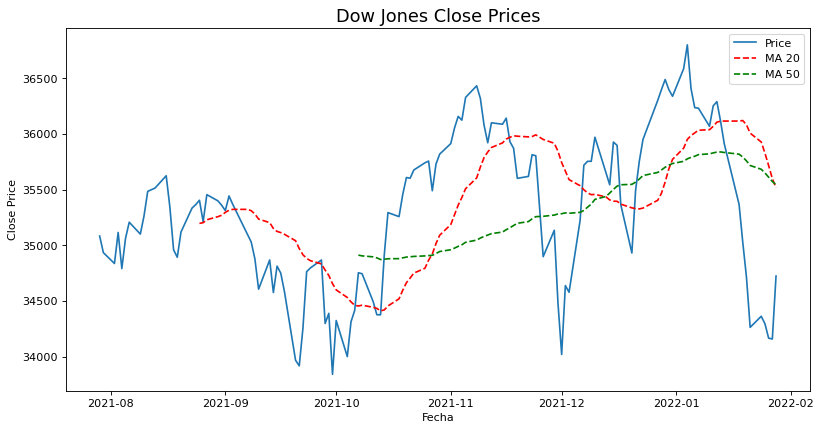

In [16]:
plt.figure(figsize=(12,6),dpi=80)
plt.plot(data_mercados.Close['^DJI'])
plt.plot(data_mercados.MA_20_DJ, 'r--')
plt.plot(data_mercados.MA_50_DJ, 'g--')
plt.title('Dow Jones Close Prices', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Close Price')
plt.legend(['Price', 'MA 20', 'MA 50'])


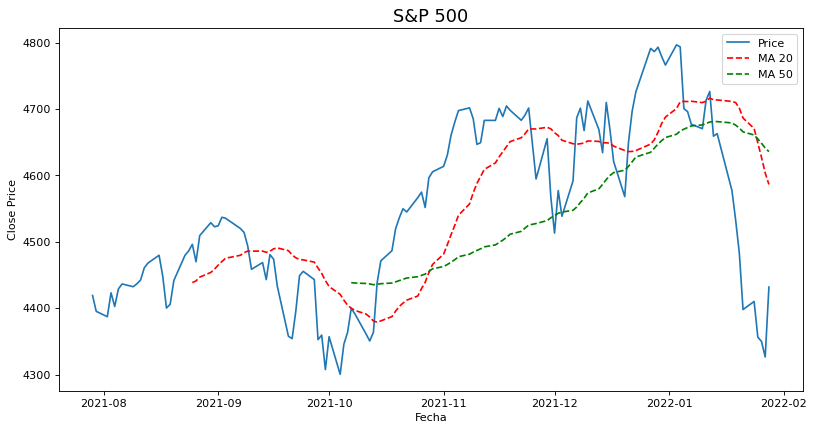

In [17]:
plt.figure(figsize=(12,6),dpi=80)
plt.plot(data_mercados.Close['^GSPC'])
plt.plot(data_mercados['MA_20_S&P'], 'r--')
plt.plot(data_mercados['MA_50_S&P'], 'g--')
plt.title('S&P 500', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Close Price')
plt.legend(['Price', 'MA 20', 'MA 50'])

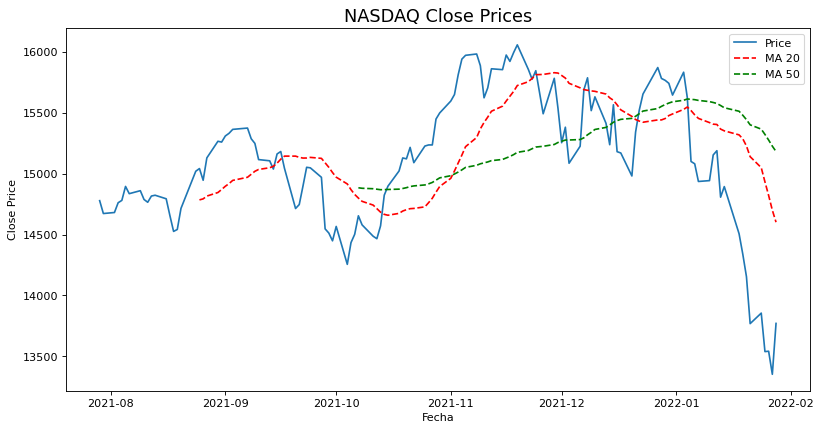

In [18]:
plt.figure(figsize=(12,6),dpi=80)
plt.plot(data_mercados.Close['^IXIC'])
plt.plot(data_mercados['MA_20_NASDAQ'], 'r--')
plt.plot(data_mercados['MA_50_NASDAQ'], 'g--')
plt.title('NASDAQ Close Prices', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Close Price')
plt.legend(['Price', 'MA 20', 'MA 50'])

# Graficos en PLOTLY

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=Dow.index, y=Dow['Close'], name='Close Price'))
fig.add_trace(go.Scatter(x=Dow.index, y=Dow['MA_20'], name='MA 20'))
fig.add_trace(go.Scatter(x=Dow.index, y=Dow['MA_50'], name='MA 50'))
fig.update_layout(title='Last 6 months - Dow Jones Industrial Average (^DJI)')
fig.update_layout(xaxis_title='Last 6 months')
fig.update_layout(yaxis_title='Close price')

fig.show()

In [20]:
from plotly.subplots import make_subplots

In [21]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados.Close['^DJI'], name='Close Price'), row=1, col=1)
fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados['MA_20_DJ'], name='MA 20 DJI'),row=1, col=1)
fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados['MA_50_DJ'], name='MA 50 DJI'),row=1, col=1)

fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados.Close['^GSPC'], name='Close Price'), row=1, col=2)
fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados['MA_20_S&P'], name='MA 20 S&P'),row=1, col=2)
fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados['MA_50_S&P'], name='MA 50 S&P'), row=1, col=2)

fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados.Close['^IXIC'], name='Close Price'), row=2, col=1)
fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados['MA_20_NASDAQ'], name='MA 20 NASDAQ'),row=2, col=1)
fig.add_trace(go.Scatter(x=data_mercados.index, y=data_mercados['MA_50_NASDAQ'], name='MA 50 NASDAQ'), row=2, col=1)

fig.update_layout(title='Last 6 months - Markets USA')
fig.update_layout(xaxis_title='Last 6 months')
fig.update_layout(yaxis_title='Close price')

fig.show()